In [139]:
#import io
import os
import numpy as np
#import pandas as pd

In [3]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype = {'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns = {'#CHROM': 'CHROM'})

In [163]:
### MATTEO
file_name = 'CEU.recode.vcf'
with open(file_name, 'r') as f:
    lines = [l for l in f if not l.startswith('##')]
header = lines.pop(0)

In [164]:
ind_pos = header.split('\t').index('POS')
ind_format = header.split('\t').index('FORMAT')

In [165]:
nr_individuals = len(header.split('\t')) - ind_format - 1
nr_sites = len(lines)

In [167]:
haplotypes = np.zeros((1, (nr_individuals * 2), nr_sites, 1), dtype='uint8')
pos = np.zeros((1, nr_sites), dtype='int32')

In [168]:
for j in range(nr_snps):
    # populate genomic position
    pos[0][j] = lines[j].split('\t')[ind_pos]
    # extract genotypes
    genotypes = lines[j].split('\t')[(ind_format+1):]
    genotypes[len(genotypes) - 1] = genotypes[len(genotypes) - 1].split('\n')[0]
    for i in range(len(genotypes)):
        if i == 0:
            i1 = 0
            i2 = 1
        else:
            i2 = i*2
            i1 = i2 - 1
        if genotypes[i].split('|')[0] == '1':
            haplotypes[0][i1,j] = '255'
        if genotypes[i].split('|')[1] == '1':
            haplotypes[0][i2,j] = '255'

In [169]:
%run -i ../ImaGene.py

In [170]:
gene = ImaGene(data=haplotypes, positions=pos)

In [171]:
gene.plot(index=0)

NameError: name 'plt' is not defined

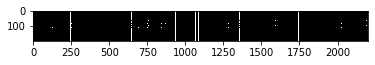

In [179]:
import matplotlib.pyplot as plt
plt.imshow(gene.data[0][:,:,0], cmap='gray')

In [93]:
i=0
genotypes = lines[i].split('\t')[(ind_format+1):]
genotypes[len(genotypes) - 1] = genotypes[len(genotypes) - 1].split('\n')[0]
len(genotypes)
genotypes[0].split('|')

['0', '0']

In [ ]:
import allel
import csv

In [5]:
geni=['AKAP9']
tot_pop =['CEU','YRI','CHB']
etn = ['EUR','AFR','EAS']

In [7]:
for p in geni:
    m=0
    while m < (len(tot_pop)):
        
        name= p+'_'+tot_pop[m]+'_'+etn[m]

        pop= read_vcf('/home/fsalvatore/Desktop/Genes/gene_pop(5)/vcf/'+name+'.vcf')
        pop= pop.drop(['CHROM', 'QUAL','FILTER', 'INFO', 'FORMAT', 'ID', 'REF', 'ALT'],1)
        
        new_df= pd.DataFrame(columns=pop.POS)
        j=0

        for i, row in pop.iterrows():
        
            haplotype=[]

            for k, column in row.iteritems():
            
                if column == '0|0':
                    haplotype.extend((0,0))
                
                elif column == '0|1':
                    haplotype.extend((0,1))
                
                elif column == '1|0':
                    haplotype.extend((1,0))
                
                elif column == '1|1':
                    haplotype.extend((1,1))
  
            new_df.iloc[:,j] = haplotype
            j+=1
        
        export_csv = new_df.to_csv(r'/home/fsalvatore/Desktop/Genes/Haplotype_reconstruction(10)/'+name+'_haplotype.csv')

        m+=1
    

RuntimeError: VCF file is missing mandatory header line ("#CHROM...")

In [9]:
pop

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,FILTER_PASS
0,6,30539205,rs4148247,C,T,NaN,NaN,100.0,True
1,6,30539235,rs376635574,G,T,NaN,NaN,100.0,True
2,6,30539269,rs529428649,C,T,NaN,NaN,100.0,True
3,6,30539297,rs549451699,G,A,NaN,NaN,100.0,True
4,6,30539315,rs566087434,C,T,NaN,NaN,100.0,True
...,...,...,...,...,...,...,...,...,...
677,6,30564914,rs553979094,C,T,NaN,NaN,100.0,True
678,6,30564924,rs78838891,T,C,NaN,NaN,100.0,True
679,6,30564925,rs190489896,A,T,NaN,NaN,100.0,True
680,6,30564953,rs117984242,C,T,NaN,NaN,100.0,True


In [163]:
#per CIT
'''pop= pd.read_csv('/home/fsalvatore/Desktop/Genes/gene_pop(5)/csv/CIT_CHB_EAS.csv')
pop= pop.drop(['CHROM', 'QUAL','FILTER', 'INFO', 'FORMAT', 'ID', 'REF', 'ALT'],1)
pop

a=pd.read_csv(r'/home/fsalvatore/Desktop/Genes/Haplotype_reconstruction(10)/CIT_CHB_EAS_haplotype.csv')
a=a.drop(['Unnamed: 0'],1)

new_df=pd.DataFrame(columns=pop.POS)

for i in range(len(a.columns)):
    x=pop.iloc[i]['POS']
    a=a.rename(columns={a.columns[i]:x})

a.to_csv(r'/home/fsalvatore/Desktop/Genes/Haplotype_reconstruction(10)/CIT_CHB_EAS_haplotype.csv')'''